<a href="https://colab.research.google.com/github/LonganPie/TinyML/blob/main/%E2%80%9CTFLite_Sine_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*斜体*
_斜体_
#第一季标题
##第二级标题
###第三级标题


- 无序列表项
* 无序列表项
+ 无序列表项

1. 有序列表项
2. 有序列表项



```python
# 这是一个Python代码块
print("Hello, World!")

#### 数学公式
使用美元符号 `$` 包围行内公式，使用 `$$` 包围块级公式。
```


```markdown
```

这是一个行内公式：$E=mc^2$

$$
\int_0^\infty e^{-x} \, dx = 1
$$


In [22]:
#!pip install tensorflow==2.0

#!pip install keras

import tensorflow as tf
import numpy as np
print(tf.__version__)
import matplotlib.pyplot as plt
import math

import sys

if sys.platform.startswith("win"):
    print("当前系统是Windows")
elif sys.platform.startswith("linux"):
    print("当前系统是Linux")
elif sys.platform.startswith("darwin"):
    print("当前系统是Mac OS")
else:
    print("当前系统是其他操作系统")

def is_colab():
  """Checks if the current environment is a Google Colab notebook.

  Returns:
    True if it's a Colab notebook, False otherwise.
  """

  return 'google.colab' in sys.modules

if is_colab():
  print("Running in Google Colab")
else:
  print("Not running in Google Colab")


2.17.0
当前系统是Linux
Running in Google Colab


* 使用seed可以让random每次生成同样的数据，方便测试

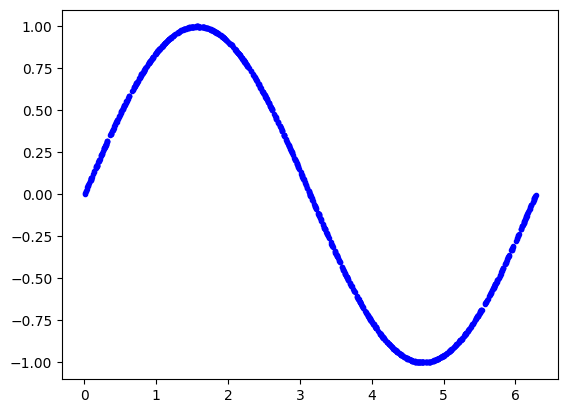

In [23]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# uniform在指定的范围内生成随机数
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')

plt.show()



* 增加噪声

1000


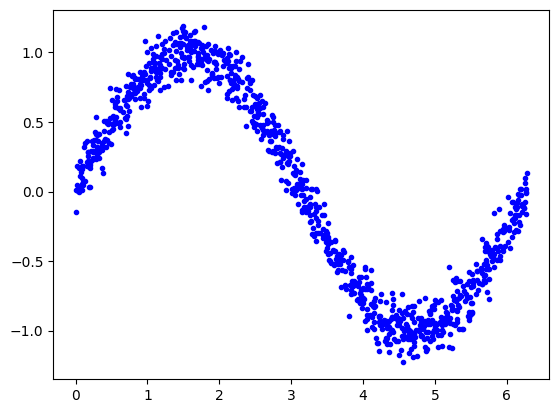

In [24]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

print(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

* 拆分数据，用以训练，验证和测试

x_train shape: (600,)  x_validate shape: (200,)  x_test shape: (200,)
TRAIN_SPLIT: 600  TEST_SPLIT: 800


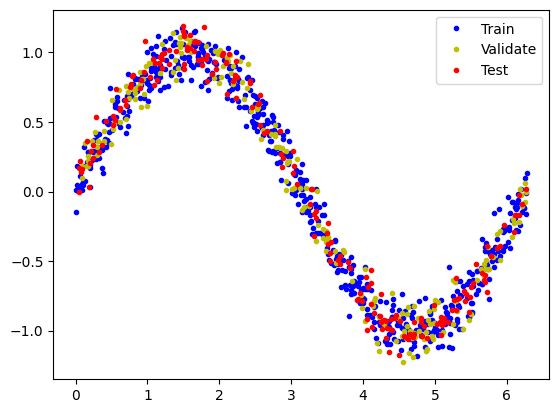

2.17.0
3.4.1


In [25]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

print("x_train shape:", x_train.shape, " x_validate shape:", x_validate.shape, " x_test shape:", x_test.shape)

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES, "数据拆分有错误"

# Plot the data in each partition in different colors:
print("TRAIN_SPLIT:", TRAIN_SPLIT, " TEST_SPLIT:", TEST_SPLIT)

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend() #增加图例
plt.show()

print(tf.__version__)
print(tf.keras.__version__)

* 运用Keras设计神经网络

Dense指的全连接层

RMSprop (Root Mean Square Propagation) 是一种常用的优化器，常用于训练神经网络。它通过对每个参数的梯度进行指数衰减的平均，来调整学习率。这种自适应学习率的方法，使得 RMSprop 能够在训练过程中自动调整学习率，从而加速收敛并提高模型的性能。

mse均方误差mean squared error函数

mae平均绝对值mean absolute error函数


In [26]:
# We'll use Keras to create a simple model architecture
#from keras import layers

#import tensorflow.keras

#from keras import Input, Dense
#from keras import Sequential

model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
#model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

model_1.add(tf.keras.layers.Input(shape=(1,)))
model_1.add(tf.keras.layers.Dense(16, activation='relu'))



# Final layer is a single neuron, since we want to output a single value
model_1.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()  #打印模型摘要信息

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

* 训练模型，并且用history_1收集结果

In [27]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                        validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3321 - mae: 0.9630 - val_loss: 0.6927 - val_mae: 0.7558
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5752 - mae: 0.6854 - val_loss: 0.4947 - val_mae: 0.6205
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4397 - mae: 0.5807 - val_loss: 0.4267 - val_mae: 0.5689
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3842 - mae: 0.5380 - val_loss: 0.3755 - val_mae: 0.5304
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3391 - mae: 0.5062 - val_loss: 0.3321 - val_mae: 0.4963
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3010 - mae: 0.4775 - val_loss: 0.2959 - val_mae: 0.4679
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2692 - mae: 0.4528 - val_loss: 0.2664 - val_mae: 0.4440
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2434 - mae: 0.4327 - val_loss: 0.2429 - val_mae: 0.4257
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

* 绘制历史数据

history_1:  <keras.src.callbacks.history.History object at 0x7ecce6d6fa30>
epochs:  range(1, 1001)


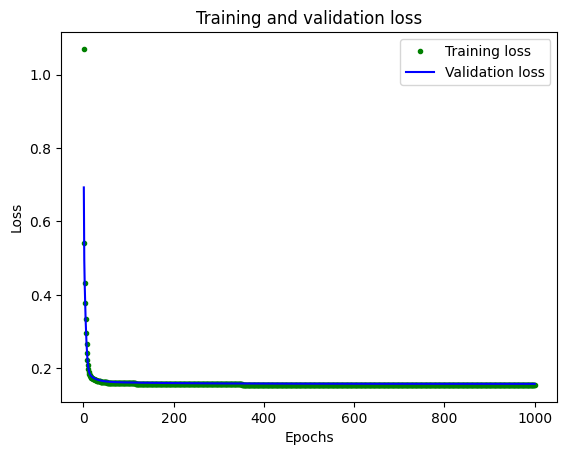

In [28]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

print("history_1: ",history_1)

epochs = range(1, len(loss) + 1)
print("epochs: ",epochs)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 跳过前100次轮次


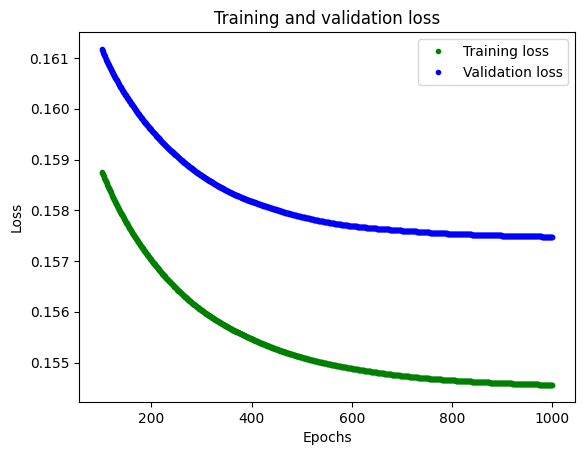

In [29]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 绘制平均绝对误差

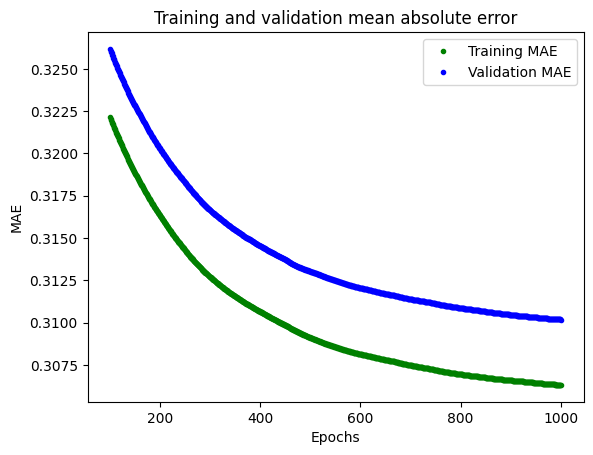

In [30]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

* 绘制网格对训练数据的预测值与期望值

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


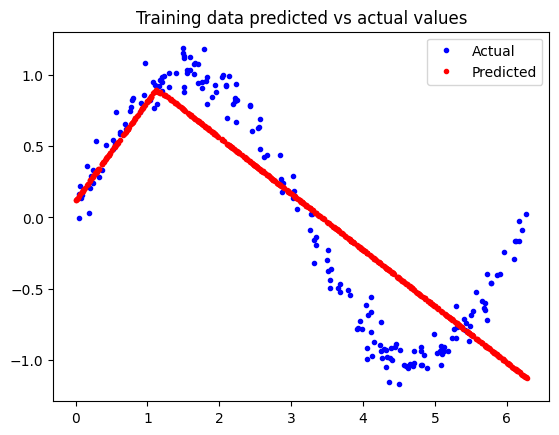

In [31]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

## 改进模型
* 两层模型效果堪忧，添加另外一层神经元，让模型加大

In [32]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
#model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(tf.keras.layers.Input(shape=(1,)))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))


# The new second layer may help the network learn more complex representations
#model_2.add(layers.Dense(16, activation='relu'))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
#model_2.add(layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

* 训练新模型

In [33]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7338 - mae: 0.7427 - val_loss: 0.4536 - val_mae: 0.5907
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4011 - mae: 0.5514 - val_loss: 0.3741 - val_mae: 0.5294
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3348 - mae: 0.5025 - val_loss: 0.3134 - val_mae: 0.4814
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2823 - mae: 0.4627 - val_loss: 0.2657 - val_mae: 0.4427
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2417 - mae: 0.4295 - val_loss: 0.2308 - val_mae: 0.4133
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2123 - mae: 0.4037 - val_loss: 0.2069 - val_mae: 0.3915
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1925 - mae: 0.3833 - val_loss: 0.1909 - val_mae: 0.3745
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1796 - mae: 0.3672 - val_loss: 0.1807 - val_mae: 0.3622
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.171

* 生成统计图

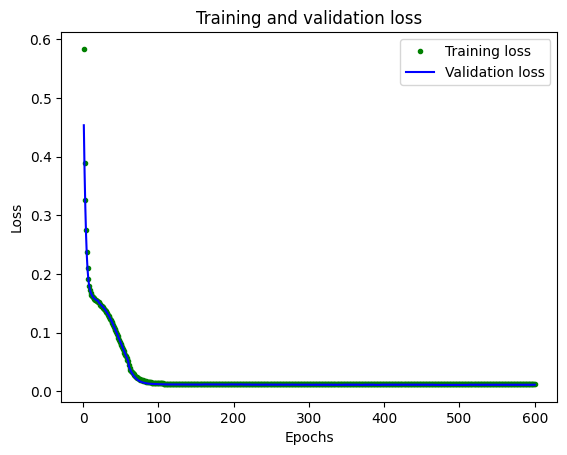

In [34]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 跳过前100轮次并绘图

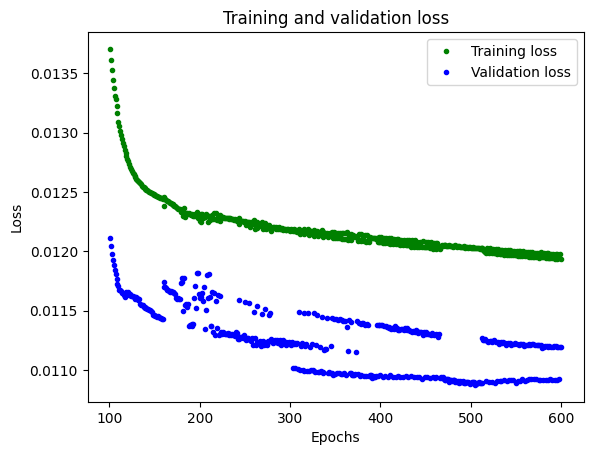

In [35]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 绘制平均绝对误差

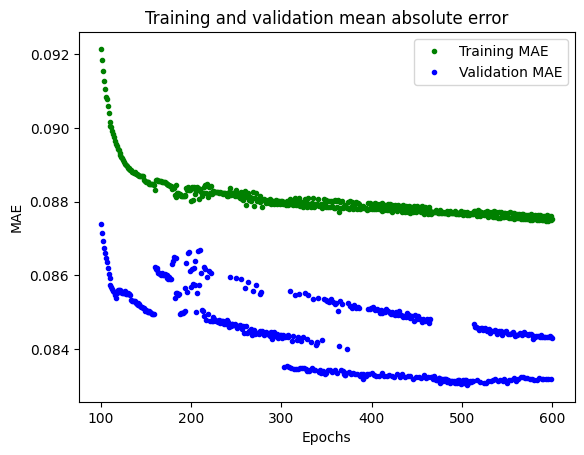

In [36]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## 测试

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - mae: 0.0766 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


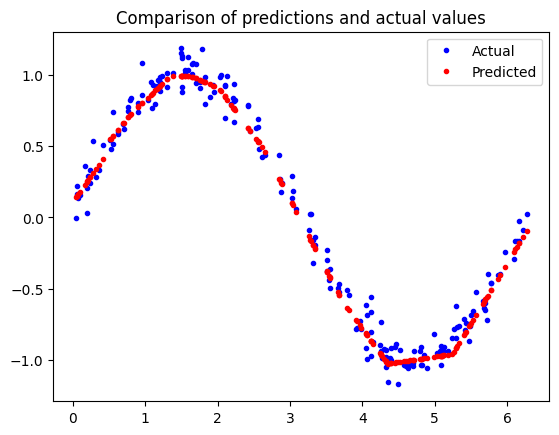

In [37]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
#print(loss)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()



转换模型

In [38]:
if is_colab():
  from google.colab import drive
  drive.mount('/content/drive')




# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
#open("sine_model.tflite," "wb").write(tflite_model)
if is_colab():
  print("Save Tensorflow Lite format to Google Colab")
  with open('/content/drive/My Drive/sine_model.tflite', 'wb') as f:
    f.write(tflite_model)
elif sys.platform.startswith("win"):
  print("Save Tensorflow Lite format to Windows")
elif sys.platform.startswith("linux"):
  print("Save Tensorflow Lite format to Linux")
elif sys.platform.startswith("darwin"):
  print("Save Tensorflow Lite format to MacOS")


#with open('~/sine_model.tflite', 'wb') as f:
#    f.write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
 for value in x_test:
 # Each scalar value must be inside of a 2D array that is wrapped
 #in a list
  yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
#open("sine_model_quantized.tflite," "wb").write(tflite_model)
if is_colab():
  print("Save Tensorflow Lite quantized format to Google Colab")
  with open('/content/drive/My Drive/sine_model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)
elif sys.platform.startswith("win"):
  print("Save Tensorflow Lite quantized format to Windows")
elif sys.platform.startswith("linux"):
  print("Save Tensorflow Lite quantized format to Linux")
elif sys.platform.startswith("darwin"):
  print("Save Tensorflow Lite quantized format to MacOS")

#with open('~/sine_model_quantized.tflite', 'wb') as f:
#    f.write(tflite_model)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved artifact at '/tmp/tmpupvtp8m4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139418514338416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139418514336304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139418509462688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139418509465152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139418513925648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139418513923360: TensorSpec(shape=(), dtype=tf.resource, name=None)
Save Tensorflow Lite format to Google Colab
Saved artifact at '/tmp/tmp69vw_cl8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tenso

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


使用Tensorflow Lite解释器来运行

Set Interpreter for Google Colab


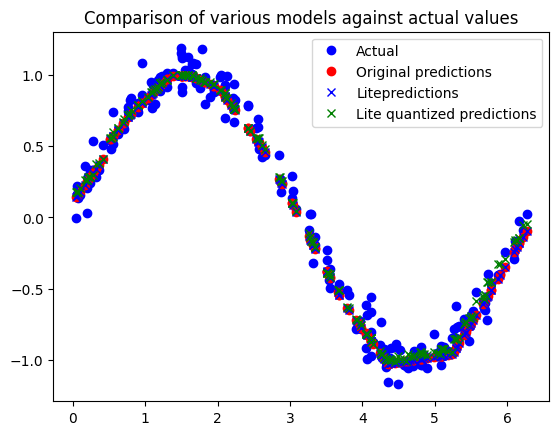

In [39]:
# Instantiate an interpreter for each model
if is_colab():
  print("Set Interpreter for Google Colab")
  sine_model = tf.lite.Interpreter('/content/drive/My Drive/sine_model.tflite')
  sine_model_quantized = tf.lite.Interpreter('/content/drive/My Drive/sine_model_quantized.tflite')
elif sys.platform.startswith("win"):
  print("Set Interpreter for Windows")
elif sys.platform.startswith("linux"):
  print("Set Interpreter for Linux")
elif sys.platform.startswith("darwin"):
  print("Set Interpreter for Macos")



# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
 # Create a 2D tensor wrapping the current x value
 x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
 # Write the value to the input tensor
 sine_model.set_tensor(sine_model_input_index, x_value_tensor)
 # Run inference
 sine_model.invoke()
 # Read the prediction from the output tensor
 sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
 # Do the same for the quantized model
 sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
 sine_model_quantized.invoke()
 sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Litepredictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
         label='Lite quantized predictions')
plt.legend()
plt.show()


对比两个模型的大小

In [40]:
import os

if is_colab():
  print("Compare difference in Google Colab")
  basic_model_size = os.path.getsize("/content/drive/My Drive/sine_model.tflite")
  print("Basic model is %d bytes" % basic_model_size)
  quantized_model_size = os.path.getsize("/content/drive/My Drive/sine_model_quantized.tflite")
elif sys.platform.startswith("win"):
  print("Compare difference in Windows")
elif sys.platform.startswith("linux"):
  print("Compare difference in Linux")
elif sys.platform.startswith("darwin"):
  print("Compare difference in MacOS")


print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Compare difference in Google Colab
Basic model is 3152 bytes
Quantized model is 3776 bytes
Difference is -624 bytes


转换成c文件

In [41]:
if is_colab():
  !pwd

  # Install xxd if it is not available
  !apt-get -qq install xxd
  # Save the file as a C source file
  !xxd -i /content/drive/'My Drive'/sine_model_quantized.tflite > /content/drive/'My Drive'/sine_model_quantized.cc
  # Print the source file
  !cat /content/drive/'My Drive'/sine_model_quantized.cc

/content
unsigned char _content_drive_My_Drive_sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x0c, 0x01, 0x00, 0x00,
  0x00, 0x04, 0x00, 0x00, 0x10, 0x04, 0x00, 0x00, 0x34, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xae, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x68, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04,

In [42]:
import sys

if sys.platform.startswith("win"):
    print("当前系统是Windows")
elif sys.platform.startswith("linux"):
    print("当前系统是Linux")
elif sys.platform.startswith("darwin"):
    print("当前系统是Mac OS")
else:
    print("当前系统是其他操作系统")



#print(sys)
#print(sys.modules)
print('google.colab' in sys.modules)
#with sys.platform.startswith("linux") as sysplat:
#  print('Operation under Linux/Colab')


def is_colab():
  """Checks if the current environment is a Google Colab notebook.

  Returns:
    True if it's a Colab notebook, False otherwise.
  """

  return 'google.colab' in sys.modules

if is_colab():
  print("Running in Google Colab")
else:
  print("Not running in Google Colab")

当前系统是Linux
True
Running in Google Colab
